<a href="https://colab.research.google.com/github/shasan06/DinnerDeciderApp/blob/main/ds_cn_ch_4_www_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DSTA 8-d

### Chapter IV - WWW, Wiki and Online social networks.

#### This __exercise__ notebook is taken from the notebook for Ch. 4 of Caldarelli-Cheesa's textbook (CC).

Please see the [class repository](https://www.dcs.bbk.ac.uk/~ale/dsta/) for the datasets and the __model solution notebook__.

In [ ]:
%pylab inline

## How to get data from The Laboratoty for Web Algorithmics (http://law.di.unimi.it/)

### This is the page with the datasets: http://law.di.unimi.it/datasets.php

#### It is possible to download a network in a WebGraph format that is a compressed binary format. The project provides various clients to extract the network strcture, in Java, C++ and in Python, py-web-graph: http://webgraph.di.unimi.it/.

#### In particular we got the graph and the related urls associated to each node of the .eu domain in the year 2005: http://law.di.unimi.it/webdata/eu-2005/ . We exctracted the graph in a form of an edge list and we also got the file with the list of urls in the same order of the node_id

In [ ]:
!head ./data/eu-2005.urls

http://de.osha.eu.int/de/gfx/statistics/EW2002_IBM_Massnahmen_gegen_Stress_am_Arbeitsplatz.php
http://de.osha.eu.int/de/print/statistics/EW2002_IBM_Massnahmen_gegen_Stress_am_Arbeitsplatz.php
http://de.osha.eu.int/de/gfx/statistics/EW2002_A_Boehm_Ausstieg_aus_dem_Arbeitsleben.php
http://de.osha.eu.int/de/print/statistics/EW2002_A_Boehm_Ausstieg_aus_dem_Arbeitsleben.php
http://de.osha.eu.int/de/gfx/statistics/EW2002_Motorola_Stresspraevention_u_Gesundheitsfoerderung.php
http://de.osha.eu.int/de/print/statistics/EW2002_Motorola_Stresspraevention_u_Gesundheitsfoerderung.php
http://de.osha.eu.int/de/gfx/statistics/EW2002_Motio_GmbH_Organisationsentwicklung_in_der_chemischen_Industrie.php
http://de.osha.eu.int/de/print/statistics/EW2002_Motio_GmbH_Organisationsentwicklung_in_der_chemischen_Industrie.php
http://de.osha.eu.int/de/print/statistics/EW2002_A_Boehm_Umbruch_im_Berufsleben.php
http://de.osha.eu.int/de/gfx/statistics/EW2002_A_Boehm_Umbruch_im_Berufsleben.php


In [ ]:
!head ./data/eu-2005_1M.arcs

0	0
0	1
1	1
2	2
2	3
3	3
4	4
4	5
5	5
6	6


In [ ]:
import networkx as nx
 
#defining the eu directed graph
eu_DG=nx.DiGraph()
#retrieve just the portion of the first 1M edges of the .eu domain 
#crawled in 2005
eu_DG=nx.read_edgelist('./data/eu-2005_1M.arcs', \
                       create_using=nx.DiGraph())
#generate the dictionary of node_is -> urls
file_urls=open('./data/eu-2005.urls')
count=0
dic_nodid_urls={}
while True:
    next_line=file_urls.readline()
    if not next_line:
        break
    next_line[:-1]
    dic_nodid_urls[str(count)]=next_line[:-1]
    count=count+1  
file_urls.close()

#generate the strongly connected component
scc=[(len(c),c) for c in sorted( nx.strongly_connected_components \
                               (eu_DG), key=len, reverse=True)][0][1]
eu_DG_SCC = eu_DG.subgraph(scc)


## Retrieving data through the  [Twitter API](https://dev.twitter.com/docs) usign the module [Twython](http://twython.readthedocs.org/en/latest/)

In [ ]:
#To get your own KEYS and TOKENS visit the following page:
#https://dev.twitter.com/docs/auth/tokens-devtwittercom 
#(you have to sign in before with your Twitter account)
#!pip install twython
from twython import Twython

# put the credentials of @your_account
APP_KEY='vxcStSP88tL77rpBSLa9IMoIr'
APP_SECRET='7EP7CTDzN6mzvSv1s0JJo2WrHowFP6MyEe9F27aCbLNbrlWdZR'
OAUTH_TOKEN='14489299-9SfKo957lp3a13f7HNAbufv6084VTMwT70OHJv5er'
OAUTH_TOKEN_SECRET='wBPOdudXfZ9Pf9swb2rkXYSWBSmyo4VdUr83IodPhX6TZ'

#this will be the handle to connect with Twitter
twitter_connection=Twython(APP_KEY, APP_SECRET, \
                           OAUTH_TOKEN,OAUTH_TOKEN_SECRET)

### How to get the timeline

In [ ]:
#the following tweets and query results
#depend on the KEYS and TOKENS of the user

res=twitter_connection.get_home_timeline()
for t in res[:5]:
    #print the text of the first 5 tweets of the actual timeline
    print ('Text of the tweet:',t[u'text'])
    #for each tweet print the mentioned users
    print ('mentions:',)
    for m in t[u'entities'][u'user_mentions']:
        print (m[u'screen_name'],)
    print ('\r')

Text of the tweet: Miley Cyrus Opened Up About Being Body-Shamed By The World After Her Infamous 2013 MTV VMAs Performance https://t.co/iEv3JpOL7m
mentions:

Text of the tweet: Mille miliardi, il piano di Trump contro il coronavirus https://t.co/74aUtprKCr via @linkiesta
mentions:
Linkiesta

Text of the tweet: The advantages of speaking a second language https://t.co/9v0vXlfkA6
mentions:

Text of the tweet: RT @SaluteLazio: +++ #Coronavirus: Sono 724 nella Regione Lazio i casi positivi al #COVID19. Di questi, 232 sono in isolamento domiciliare,…
mentions:
SaluteLazio

Text of the tweet: RT @AstronautiNEWS: MissioneCasa: idee spaziali a prova di isolamento forzato - Parte 1 
https://t.co/EcrHNV1CPB https://t.co/JkP2pL5xMZ
mentions:
AstronautiNEWS



### How to get user information

In [ ]:
res=twitter_connection.show_user(screen_name='@BarackObama')
print (res)
print ('location: ',res[u'location'])
print ('number of followers: ',res['followers_count'])

{'id': 813286, 'id_str': '813286', 'name': 'Barack Obama', 'screen_name': 'BarackObama', 'location': 'Washington, DC', 'profile_location': None, 'description': 'Dad, husband, President, citizen.', 'url': 'https://t.co/93Y27HEnnX', 'entities': {'url': {'urls': [{'url': 'https://t.co/93Y27HEnnX', 'expanded_url': 'https://www.obama.org/', 'display_url': 'obama.org', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 114171078, 'friends_count': 608479, 'listed_count': 229503, 'created_at': 'Mon Mar 05 22:08:25 +0000 2007', 'favourites_count': 11, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 15745, 'lang': None, 'status': {'created_at': 'Wed Mar 18 14:57:45 +0000 2020', 'id': 1240291304573227009, 'id_str': '1240291304573227009', 'text': 'In the meantime, remember to check up by phone on elderly or vulnerable friends and neighbors who may need our help.', 'truncated': False, 'entities': {'hashtags': 

### Retrieving [tweets](https://dev.twitter.com/docs/platform-objects/tweets) with the '[search](https://dev.twitter.com/docs/api/1.1/get/search/tweets)' function ([parameter q](https://dev.twitter.com/docs/using-search))

In [ ]:
res=twitter_connection.search(q='#ebola', count=2)
for t in res['statuses']:
    print ("Text of the tweet:",t[u'text'])

Text of the tweet: RT @DrTedros: It’s been over a month since the last #Ebola case in #DRC. If it stays that way, the outbreak will be declared over in less t…
Text of the tweet: RT @DrTedros: It’s been over a month since the last #Ebola case in #DRC. If it stays that way, the outbreak will be declared over in less t…


## Hits algorithm

### Test Graph

{'A': 0.31622776601683794, 'B': 0.6324555320336759, 'C': 0.31622776601683794, 'D': 0.6324555320336759}
{'A': 0.7302967433402215, 'B': 0.18257418583505539, 'C': 0.5477225575051661, 'D': 0.36514837167011077}


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


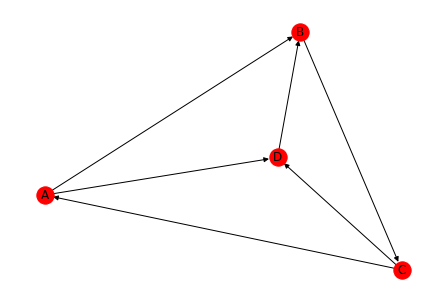

In [ ]:
def HITS_algorithm(DG):
    auth={}
    hub={}

    k=1000 #number of steps

    for n in DG.nodes():
        auth[n]=1.0
        hub[n]=1.0

    for k in range(k):
        norm=0.0
        for n in DG.nodes():
            auth[n]=0.0
            for p in DG.predecessors(n):
                auth[n]+=hub[p]
            norm+=auth[n]**2.0
        norm=norm**0.5
        for n in DG.nodes():
            auth[n]=auth[n]/norm

        norm=0.0
        for n in DG.nodes():
            hub[n]=0.0
            for s in DG.successors(n):
                hub[n]+=auth[s]
            norm+=hub[n]**2.0  
        norm=norm**0.5
        for n in DG.nodes():
            hub[n]=hub[n]/norm
        
        return auth,hub

DG=nx.DiGraph()

DG.add_edges_from([('A','B'),('B','C'),('A','D'), \
                   ('D','B'),('C','D'),('C','A')])

#plot the graph
nx.draw(DG,with_labels=True)

(auth,hub)=HITS_algorithm(DG)

print (auth)
print (hub)

# Q1.  Use built in hits function to find hub and authority scores. Can you spot the differences in result? 

### Adjacency matrix representation with basic operations

In [ ]:
def matrix_transpose(M):
    M_out=[]
    for c in range(len(M[0])):
        M_out.append([])
        for r in range(len(M)):
            M_out[c].append(M[r][c])
    return M_out
            

def matrix_multiplication(M1,M2):
    M_out=[]
    for r in range(len(M1)):
        M_out.append([])
        for j in range(len(M2[0])):
            e=0.0
            for i in range(len(M1[r])):
                e+=M1[r][i]*M2[i][j]
            M_out[r].append(e)
    return M_out
            

adjacency_matrix1=[
                  [0,1,0,1],
                  [1,0,1,1],
                  [0,1,0,0]
                  ]

adjacency_matrix2=matrix_transpose(adjacency_matrix1)

print ("Transpose adjacency matrix:",adjacency_matrix2)

res_mul=matrix_multiplication(adjacency_matrix1,adjacency_matrix2)

print ("Matrix multiplication:",res_mul)


Transpose adjacency matrix: [[0, 1, 0], [1, 0, 1], [0, 1, 0], [1, 1, 0]]
Matrix multiplication: [[2.0, 1.0, 1.0], [1.0, 3.0, 0.0], [1.0, 0.0, 1.0]]


### Power iteration algorithm

In [ ]:
adjacency_matrix=[
                  [0,1,0,1],
                  [1,0,1,1],
                  [0,1,0,0],
                  [1,1,0,0]
                  ]
vector=[
        [0.21],
        [0.34],
        [0.52],
        [0.49]
        ]

for i in range(100): #100 iterations is enough for the convergence!
    res=matrix_multiplication(adjacency_matrix,vector)
    norm_sq=0.0
    for r in res:
        norm_sq=norm_sq+r[0]*r[0]
    vector=[]
    for r in res:
         vector.append([r[0]/(norm_sq**0.5)])
    
print ("Maximum eigenvalue (in absolute value):",norm_sq**0.5)
print ("Eigenvector for the maximum eigenvalue:",vector)


Maximum eigenvalue (in absolute value): 2.1700864866260337
Eigenvector for the maximum eigenvalue: [[0.5227207256439814], [0.6116284573553772], [0.2818451988548684], [0.5227207256439814]]


### Computing the HITS algorithm onto the WWW strongly connected component of the .eu domain

In [ ]:
import operator
print(eu_DG_SCC)
(auth,hub)=HITS_algorithm(eu_DG_SCC)
sorted_auth = sorted(auth.items(), key=operator.itemgetter(1))
sorted_hub = sorted(hub.items(), key=operator.itemgetter(1))

#top ranking auth
print ("Top 5 auth")
for p in sorted_auth[:5]:
    print (dic_nodid_urls[p[0]],p[1])
    
#top ranking hub
print ("\nTop 5 hub")
for p in sorted_hub[:5]:
    print (dic_nodid_urls[p[0]],p[1])


Top 5 auth
http://ue.eu.int/cms3_applications/showPage.ASP?id=756&lang=pt&mode=g 9.674263879950006e-05
http://www.etf.eu.int/WebSite.nsf/Publications?ReadForm&LAN=EN&Key=Western+Balkans~~Uzbekistan 9.674263879950006e-05
http://ue.eu.int/cms3_applications/Applications/newsRoom/loadbook.asp?BID=950&LANG=8&cmsId=365 9.674263879950006e-05
http://europa.eu.int/ploteus/portal/home.jsp?language=fi_FI 9.674263879950006e-05
http://www.europarl.eu.int/interp/public/careers/careers_en.htm 9.674263879950006e-05

Top 5 hub
http://www.etf.eu.int/ 7.657111011209206e-07
http://www.europarl.eu.int/interp/public/default_en.htm 7.657111011209206e-07
http://ue.eu.int/cms3_fo/showPage.asp?id=603&lang=pt&mode=g 7.657111011209206e-07
http://ue.eu.int/cms3_fo/showPage.asp?id=604&lang=pt&mode=g 7.657111011209206e-07
http://ue.eu.int/showPage.asp?id=357&lang=pt 7.657111011209206e-07


# Q2.  Use built in hits function to find hub and authority scores. Can you spot the differences in result? 

## Compute the PageRank

In [ ]:
def pagerank(graph, damping_factor=0.85, max_iterations=100, 
min_delta=0.00000001):
    
    nodes = graph.nodes()
    graph_size = len(nodes)
    if graph_size == 0:
        return {}
    
    # itialize the page rank dict with 1/N for all nodes
    pagerank = dict.fromkeys(nodes, (1.0-damping_factor)*1.0/ \
                             graph_size)
    min_value=(1.0-damping_factor)/len(nodes)
    
    for i in range(max_iterations):
        diff = 0 #total difference compared to last iteraction
        # computes each node PageRank based on inbound links
        for node in nodes:
            rank = min_value
            for referring_page in graph.predecessors(node):
                rank += damping_factor * pagerank[referring_page]/ \
                len(list(graph.neighbors(referring_page)))
            diff += abs(pagerank[node] - rank)
            pagerank[node] = rank
        
        #stop if PageRank has converged
        if diff < min_delta:
            break
    
    return pagerank

## PageRank for a test Network (and with [Networkx](http://networkx.github.io/documentation/latest/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html))

{1: 0.17359086186340225, 2: 0.33260446516778386, 3: 0.3202137953926163, 4: 0.17359086304186191}
{1: 0.17359061775974502, 2: 0.33260554622228633, 3: 0.3202132182582236, 4: 0.17359061775974502}


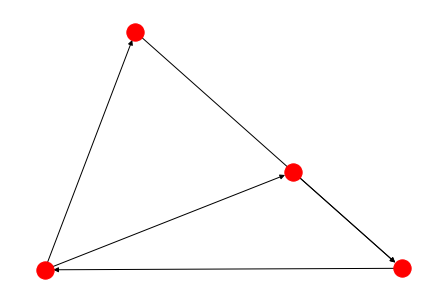

In [ ]:
G=nx.DiGraph()
G.add_edges_from([(1,2),(2,3),(3,4),(3,1),(4,2)])
#plot the network
nx.draw(G)

#our Page Rank algorithm
res_pr=pagerank(G,max_iterations=10000,min_delta=0.00000001, \
                damping_factor=0.85)
print (res_pr)

#Networkx Pagerank function
print (nx.pagerank(G,max_iter=10000))

## Generate and plot the Twitter Mention Network

In [ ]:
def generate_network(list_mentions):
    DG=nx.DiGraph()
    for l in list_mentions:
        if len(l)<2: continue
        for n in l[1:]:
             if not DG.has_edge(l[0],n):
                DG.add_edge(l[0],n, weight=1.0 )
        else:
                DG[l[0]][n]['weight']+=1.0
    return DG

#extracting user and mentions for each tweet
res=twitter_connection.search(q='#FutureDecoded', count=5000)
#the first will be the tweer user
list_users={}
list_mentions=[]
for t in res['statuses']:
    list_unique_ids=[]
    print ("User Screen Name and Id:",(t[u'user'][u'screen_name'], \
                                      t[u'user'][u'id_str']))
    list_unique_ids.append(t[u'user'][u'id_str'])
    if not t[u'user'][u'id_str'] in list_users:
        list_users[t[u'user'][u'id_str']]=t[u'user'][u'screen_name']
    print ("List of Mentions:",)
    for m in t[u'entities'][u'user_mentions']:
        if m['id_str']!=t[u'user'][u'id_str']:
                list_unique_ids.append(m['id_str'])
                if not m['id_str'] in list_users:
                    list_users[m['id_str']]=m[u'screen_name']
        print (m[u'screen_name'],m['id_str']),
    print ("\r")
    print (list_unique_ids)
    list_mentions.append(list_unique_ids)
    print ("\n")            

net_mentions=generate_network(list_mentions) 



User Screen Name and Id: ('SatyamThakur754', '944840445061775360')
List of Mentions:
MicrosoftIndia 37942193

['944840445061775360', '37942193']


User Screen Name and Id: ('FutureWorldCen', '2198146752')
List of Mentions:

['2198146752']


User Screen Name and Id: ('Nikhilkanoje6', '789069681365770240')
List of Mentions:
MicrosoftIndia 37942193

['789069681365770240', '37942193']


User Screen Name and Id: ('SanjuBhatnagar9', '1213420413939638272')
List of Mentions:
MicrosoftIndia 37942193

['1213420413939638272', '37942193']


User Screen Name and Id: ('Shadabq96067325', '1219319509409906688')
List of Mentions:
MicrosoftIndia 37942193

['1219319509409906688', '37942193']


User Screen Name and Id: ('bindiya_garg', '1184776234615525377')
List of Mentions:
MicrosoftIndia 37942193

['1184776234615525377', '37942193']


User Screen Name and Id: ('alex31602258', '1240106701589590016')
List of Mentions:
MicrosoftIndia 37942193

['1240106701589590016', '37942193']


User Screen Name and Id:

### Top Pageranks on the Twitter generated Network (influencers)

In [ ]:
pr=nx.pagerank(net_mentions,max_iter=10000)
sorted_pr=sorted(pr.items(), key=operator.itemgetter(1),reverse=True)
#top10 pagerank twitter user from the selected search
for page in sorted_pr[:10]:
    print (list_users[page[0]],page[1])

MicrosoftIndia 0.45515217481481435
FlashTweet 0.010407880344633663
SatyamThakur754 0.00562568362990053
Nikhilkanoje6 0.00562568362990053
SanjuBhatnagar9 0.00562568362990053
Shadabq96067325 0.00562568362990053
bindiya_garg 0.00562568362990053
alex31602258 0.00562568362990053
virani_09 0.00562568362990053
BHARAT__SURYA 0.00562568362990053


## Community Detection for the scwiki web graph

In [ ]:
#load the directed and undirected version og the scwiki graph
scwiki_pagelinks_net_dir=nx.read_edgelist \
("./data/scwiki_edgelist.dat",create_using=nx.DiGraph())
scwiki_pagelinks_net=nx.read_edgelist("./data/scwiki_edgelist.dat")

#load the page titles
diz_titles={}
file_titles=open("./data/scwiki_page_titles.dat",'r')
while True:
    next_line=file_titles.readline()
    if not next_line:
        break
    print (next_line.split()[0],next_line.split()[1])
    diz_titles[next_line.split()[0]]=next_line.split()[1]
    
file_titles.close()

14209 "Weird_Al"_Yankovic
13890 ''Assandira''
10258 'O_sole_mio
2361 'Onne
6118 (Sittin'_on)_The_Dock_of_the_Bay
6119 (Sittin'_on)_the_Dock_of_the_Bay
10062 ...altrimenti_ci_arrabbiamo!
11039 1054
11019 1065
16053 1082
11222 1090
12579 1096
11596 1100
16054 1110
16055 1138
11307 113_(nùmeru_de_emerzèntzia)
16056 1166
10560 118_-_Servìtziu_de_emerzèntzia_sanidària
16057 1194
11598 1200
16058 1222
16059 1250
16060 1278
16061 1306
15041 1315
10934 1324
16062 1334
13534 1336
12350 1340
15040 1343
16063 1362
15039 1371
16064 1390
15038 1399
11590 1409
16065 1418
15037 1427
11067 1431
12108 1444
16066 1446
15036 1455
11054 1473
16067 1474
13112 1483
10971 1489
13533 1490
11055 1492
12135 1497
16068 1502
11221 1510
10965 1514
11099 1515
13113 1520
13500 1530
12079 1533
13499 1542
13516 1543
12078 1580
12130 1584
10970 1588
10967 1596
10961 1599
13498 1600
11321 1608
13204 1616
13497 1627
10963 1667
10968 1669
11049 1685
13535 1711
12362 1713
11100 1720
13519 1724
11048 1750
12361 1753
11094 1

7616 Frantziscu_de_Assisi
7434 Frantziscu_de_Sales
8746 Frantziscu_di_Sales
9962 Franziscu_Antoni_Broccu
7929 Franziscu_Borromini
7600 Franziscu_Ignaziu_Mannu
10275 François_Rabelais
7252 François_Villon
12732 Frassa_dicotomia
3997 Frearzu
4693 Freccia_Verde
10534 Fred_Buscaglione
4480 Freddie_Mercury
4484 Freddy_Mercury
13734 Fredericton
13430 Freàlzu
1661 Freàrgiu
1662 Friarju
7023 Fridolin_Weis_Bentzon
11206 Friuli-Venetzia_Giulia
12075 Friuli-Venezia_Giulia
12002 Fronte_de_Liberassione_Natzionale_Corsicanu
6334 Fràgula
6874 Frància
10860 Frègula
8276 Frédéric_Chopin
10645 Frédéric_Ozanam
3240 Frùmini_Majori
12525 Frùmini_Mayori
7653 Fulgentziu_de_Ruspe
9285 Fumettu
3228 Fumetu
11243 Fumighete
13903 Funayūrei
13828 Funchal
11384 Funtana_Coberta
8781 Funtana_Meiga
12064 Funtana_de_Lucullo
11194 Furchita
5524 Furferarzu
11255 Furriada_in_tundu
12434 Furtei
11405 Fusile
11186 Fusione_perfetta_de_su_1847
6220 Fustialvu
1224 Futei
5504 Futtientu
10954 Fábio_Assunção
8010 Fèmina
8497 Fédé

5131 Petralia_Sottana
6168 Phalacrocorax_carbo
10152 Philipp_Kirkorov
9916 Philippe_Daverio
11170 Philosophy_of_a_Knife
14356 Phlebotomus_papatasi
13086 Phoenix
8910 Phong_Nha_-_Ke_Bang
10378 Phu_Quoc
6389 Phytolacca_dioica
14293 Pi_greco
14271 Pi_grecu
4971 Piaghe
5132 Piana_degli_Albanesi
12541 Pianu_de_renaschida_democratica
5025 Piazza_Armerina
6159 Pibera
6461 Piberone
3659 Pibiri
9381 Picilemu
6864 Piemonte
14298 Pier_Crisologo
8793 Pier_Damiani
11305 Pier_Ferdinando_Casini
8405 Pier_Lombardo
11212 Pier_Luigi_Cantarelli
9792 Pier_Luigi_da_Palestrina
6885 Pier_Paolo_Pasolini
8605 Piermatteo_d'Amelia
12982 Pierre
8268 Pierre-Jean_De_Smet
8472 Pierre_Teilhard_de_Chardin
8002 Pierre_Trudeau
7142 Piet_Mondrian
5026 Pietraperzia
7239 Pietro_Casu
11646 Pietro_Delitala
8873 Pietro_Mascagni
10835 Pietro_Mennea
7889 Pietro_Valpreda
8934 Pietro_da_Cortona
8868 Pietro_dae_Cortona
9513 Pieve_Ligure
16133 Pikachu
6163 Pilloni
11703 Pilos_a_s'imberta
6767 Pimpinella_anisum
13637 Pina_de_Ebro
11

10440 Jesi
9301 Jfblanc
8656 JhsBot
2241 Ji-Elle
11746 Jmvgpartner/common.js
2180 Jon_Harald_Søby
8726 Jon_Harald_Søby/vector.css
8725 Jon_Harald_Søby/vector.js
11835 Jonathunder
3048 Jorunn
2671 Jose77
8579 Jotterbot
9013 Juhko/monobook.js
9014 Juhko/vector.js
4659 Julian_Mendez
8391 Juliancolton
6001 Juliancolton/monobook.js
3578 Jumpdaphukup~scwiki
3873 Junafani
12027 JurgenNL/common.css
7498 Justass
1873 Jvano~scwiki
8580 Jyothis
4985 JøMa
11742 JøMa/common.css
10882 KLBot2
9835 Kal-El
8801 KamikazeBot
3468 Kanesue
9183 Kanjy
5529 Kanonkas/monobook.js
9868 Kasirbot
14258 Katxis
2635 Kelovy
9185 Kgsbot
3939 KhanBot
7437 Kimi95
6790 Kirmizi~scwiki
9218 Klyman
7656 Knopfkind
11355 Knopfkind/common.css
11230 Knopfkind/common.js
2047 Koavf
10398 Kolega2357
1993 Korg
1994 Korg/monobook.js
9300 Koyak
9168 Kpeterzell
12606 KristiaWeatherl
1995 Krol~scwiki
10338 Krzysiu
9876 KuduIO/common.js
8429 Kuvaly
6000 Kuvaly/monobook.js
8719 Kuvaly/vector.js
7644 Kved/monobook.js
4472 Kwj2772/monoboo

6353 Thierry_Caro
2873 Thijs!bot
6268 Thingg
2850 Thogo
14162 Thomaneka~scwiki
6080 Thurs
6607 Thutiu
5742 Tia_solzago
5813 Tieum_p
8009 Tilippu
5636 Timrem
2855 Tiria~scwiki
6465 Titus_Vespasianus
3422 Tiuballoe
2879 Tiyoringo
9292 TjBot
9294 Tjmoel
6786 Tlustulimu
1085 Toby_Bartels
5607 Todd1234ddot
1100 Tomi
10128 Tomtomn00
7333 Toni_Pecoraro
9478 Tonietto
6939 Tony_Esopi
6015 Topfive
6831 Torno_castanowiki
5581 Torredibabele
5708 Torsolo
4223 Toteninsel
2835 Totoreddu
6673 Tresoldi
2882 Tressun
6289 Trevas
5582 TrietHa
5762 Trivelt
5620 Truru
6424 TrzelChic4
5628 Tschaensky
5725 Turillazzo
3905 Tuveri_Fernando
6085 Twice25
3050 Tximist
4266 Tziu_riky
1076 Ugen64
12758 Uharteko
5631 Ulm
14062 Unapersona
6245 Unara
6935 Uomodis08
6081 Utrechtse
5439 Vaghestelledellorsa
6437 Vale_maio
4224 Valentim
6574 VanHelsing.16
6619 Vanzabee
2383 Vargenau
6239 VasilievVV
6559 Vavrik
8437 Vhorvat
7072 Vigorous_action
7050 Vincent_Steenberg
9585 Vituzzu
14346 VityUvieu
6395 Vlad1918
10295 Vogone
2